In [1]:
import numpy as np
import kmeans
import common
import naive_em
import em

In [2]:
X = np.loadtxt("toy_data.txt")

In [3]:
k=3
seed=0

In [4]:
mix, post = common.init( X, k, seed)
prob, post = naive_em.estep(X, mix)

print(X.shape,' and ',prob.shape, ' and ', post)

(250, 2)  and  (250, 3)  and  -1388.0818000440702


In [5]:
K = np.array([1,2,3,4])
seed = np.array([ 0, 1, 2, 3, 4])

In [6]:
kk= 3
s = 0

mix, post = common.init( X, kk, s)
mixture, post, ll = naive_em.run(X, mix, post)
print('The cost for K = %d and seed %d is : '%(kk, s), ll)
#common.plot( X, mixture, post, title='The mixture model for K = %d and seed %d'%(kk, s))

The cost for K = 3 and seed 0 is :  -1138.8908996872674


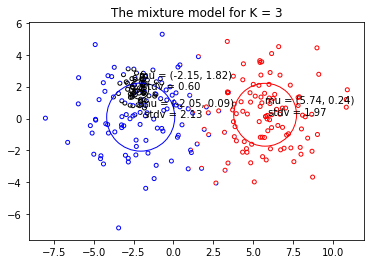

In [7]:
common.plot( X, mixture, post, title='The mixture model for K = %d'%(kk))

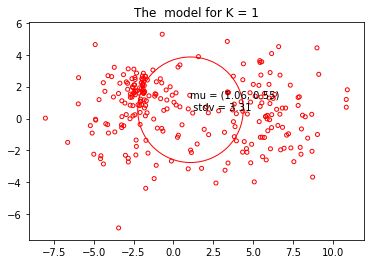

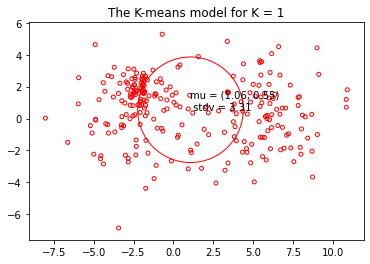

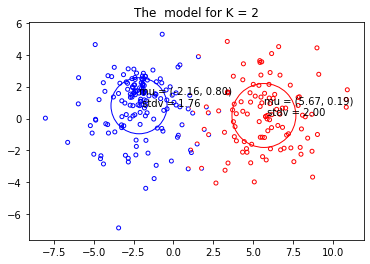

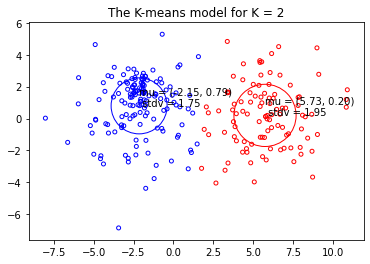

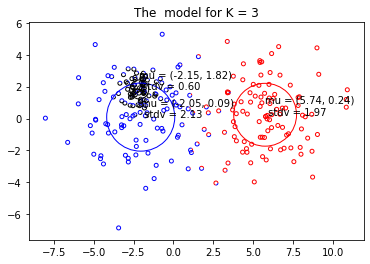

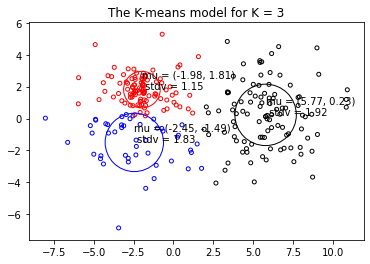

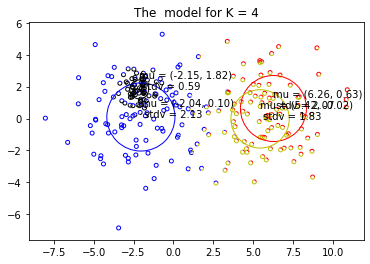

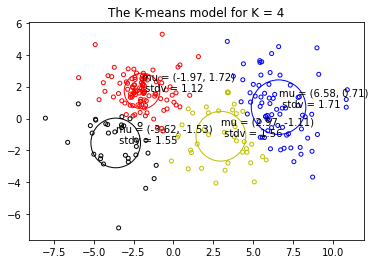

In [8]:
l = np.zeros_like(seed)
l2= np.zeros_like(seed)
for kk in K:
    for s in seed:
        mix, post = common.init( X, kk, s)
        mixture, post, ll = naive_em.run(X, mix, post)
        mix2, post2 = common.init( X, kk, s)
        mixture2, post2, cost = kmeans.run(X, mix2, post2)
        l2[s] = cost
        l[s]=ll
        #print( ll,' and')
    sm = l.argmin()
    sm2 = l2.argmin()
    
    mix, post = common.init( X, kk, sm)
    mixture, post, ll = naive_em.run(X, mix, post)
    
    mix2, post2 = common.init( X, kk, sm2)
    mixture2, post2, cost = kmeans.run(X, mix2, post2)
    
    common.plot( X, mixture, post, title='The  model for K = %d'%(kk))
    common.plot( X, mixture2, post2, title='The K-means model for K = %d'%(kk))

# Optimizing with <b>BIC</b> (Bayesian Information Criterion) 

In [9]:
s = 0
l= np.zeros_like(K)

for kk in K:
    mix, post = common.init( X, kk, s)
    mixture, post, ll = naive_em.run(X, mix, post)
    l[kk-1] = common.bic(X, mixture, ll)
    
print('Best K is = ',(l.argmax()+1))
print('Best BIC is ',l[l.argmax()])

Best K is =  3
Best BIC is  -1169


In [10]:
mix, post = common.init( X, 3, s)
mixture, post, ll = naive_em.run(X, mix, post)
common.bic(X, mixture, ll)

-1169.2589347355097